This is a script for data preparation. Taking the Zyxin data in pny format and shrink to channel 4,6,7 only to get rid of the forces data and transformation related to speed up in data loading and model building.
The file in pny format has 8 channels. Among them, 
ch 4 is cell mask; ch 6 is Zyxin; ch 7 is another protein like Paxillin or Actin (could be others, but here only interested in these)
Original data from
https://uchicago.app.box.com/s/663yzjrxh41antctsyu2i872artqrmtd/folder/226678259550
as in 
Machine learning interpretable models of cell mechanics from protein images. Schmitt MS, Colen J, Sala S, Devany J, Seetharaman S, Caillier A, Gardel ML, Oakes PW, Vitelli V. Cell 2024, 187 (2): 481-494.e24 (PMID: 36911285) 

Liya Ding, 2024.02.20

In [ ]:
import numpy as np
import os

In [11]:
# source data dir
npy_data_root_dir = '/mnt/d/lding/zyxin/data_pny'
# target data dir
subset_data_root_dir = '/mnt/d/lding/zyxin/data_pny_subset'

if not os.path.isdir(subset_data_root_dir):
        os.makedirs(subset_data_root_dir)

# for each sub-folder
for dataset_name in os.listdir(npy_data_root_dir):

    data_root = os.path.join(npy_data_root_dir, dataset_name)

    # for each experiment, get all the folder with "cell" in the folder name
    subdirs = [x for x in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, x)) and ('cell' in x)]

    print(dataset_name)
    print((np.asarray(subdirs)))
    print(len(subdirs))

    # target subfolder for each experiment
    tiff_dir_root = os.path.join(subset_data_root_dir, 'C467_'+ dataset_name)
    if not os.path.isdir(tiff_dir_root):
        os.makedirs(tiff_dir_root)

    # for each cell in this experiment
    for subdir in subdirs:
        data_subdir = os.path.join(data_root, subdir)
        output_subdir = os.path.join(tiff_dir_root, subdir)
        
        if not os.path.isdir(output_subdir):
            os.makedirs(output_subdir)    
        
        # get the files with 'Disp_Trac_CellMask_ForceMask_Actin_' in the file name
        filenames = [x for x in os.listdir(data_subdir) if os.path.isfile(os.path.join(data_subdir, x)) and ('Disp_Trac_CellMask_ForceMask_Actin_' in x)]

        # here do the loop with index in order to do zero padding where the original files don't do
        for frame in range(len(filenames)):
            # read in pny file
            im = np.load(os.path.join(data_subdir, 'Disp_Trac_CellMask_ForceMask_Actin_%d.npy'%frame)) # has shape [7, H, W] where H, W are height and width of image
            # ch 4 mask; ch 6 Zyxin; ch 7 Paxillin or Actin
            np.save(os.path.join(output_subdir, 'CellMask_Zyxin_PaxorActin_'+str(frame).zfill(3)+'.npy'),im[[4,6,7],:,:])

TractionData_21_02_17_ZyxinActin
['cell_0' 'cell_1' 'cell_3' 'cell_4']
4
TractionData_21_07_27_ZyxinPaxillin
['cell_0' 'cell_1' 'cell_2' 'cell_3' 'cell_4' 'cell_5' 'cell_6' 'cell_7']
8
TractionData_27_04_21_ZyxinPaxillin
['cell_1' 'cell_2' 'cell_4' 'cell_5']
4


In [12]:
# below is just to confirm that correct channels are obteined
test_subset = im[[4,6,7],:,:]
test_subset.shape

(3, 992, 992)

(-0.5, 991.5, 991.5, -0.5)

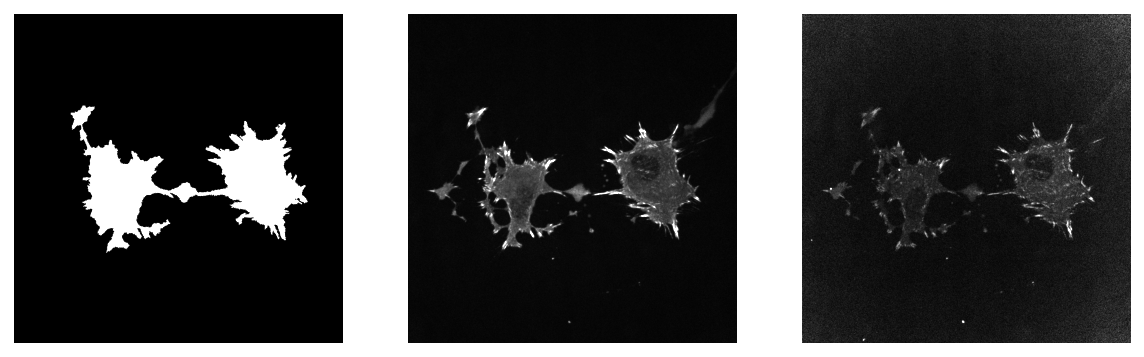

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10,6), dpi=144, facecolor='w', edgecolor='k')
ax[0].imshow(test_subset[0,:,:], cmap=plt.cm.gray,vmax=200,vmin=0)
ax[0].axis('off')
ax[1].imshow(test_subset[1,:,:], cmap=plt.cm.gray,vmax=300,vmin=0)
ax[1].axis('off')
ax[2].imshow(test_subset[2,:,:], cmap=plt.cm.gray,vmax=100,vmin=0)
ax[2].axis('off')
